In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [32]:
#Read the income return on the type of degree CSV
Degrees_Payback = pd.read_csv('degrees-that-pay-back.csv')
Degree_df = pd.DataFrame(Degrees_Payback)

#Ready the salary averages based on college type
Salary_By_College = pd.read_csv('salaries-by-college-type.csv')
College_Salary_df = pd.DataFrame(Salary_By_College)

#Read the income based upon region
Salary_By_Region = pd.read_csv('salaries-by-region.csv')
Region_Salary_df = pd.DataFrame(Salary_By_Region)

In [33]:
Region_Salary_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [34]:
#Check for duplicate rows and create a column for duplicate Rows in DF (There were non)
Region_Salary_df["Is_Duplicated"]= Region_Salary_df.duplicated()

#Rename the columns
Region_Salary_df.columns = ['School Name', 'Region', 'Starting_Mid', 'Mid_Sal', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th','Is_Duplicated']

#Create list for loop
Dollar_Cols = ['Starting_Mid', 'Mid_Sal', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th']

#Loop through DF and convert columns with Dollar $ign (objects) to numeric values (integer)
for x in Dollar_Cols:
    Region_Salary_df[x] = Region_Salary_df[x].str.replace("$","")
    Region_Salary_df[x] = Region_Salary_df[x].str.replace(",","")
    Region_Salary_df[x] = pd.to_numeric(Region_Salary_df[x])

Region_Salary_df.head()

#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Salary_df.sort_values(['Region', 'Starting_Mid'], ascending=[True, False])
Region_Sort.head()


,School Name,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,False


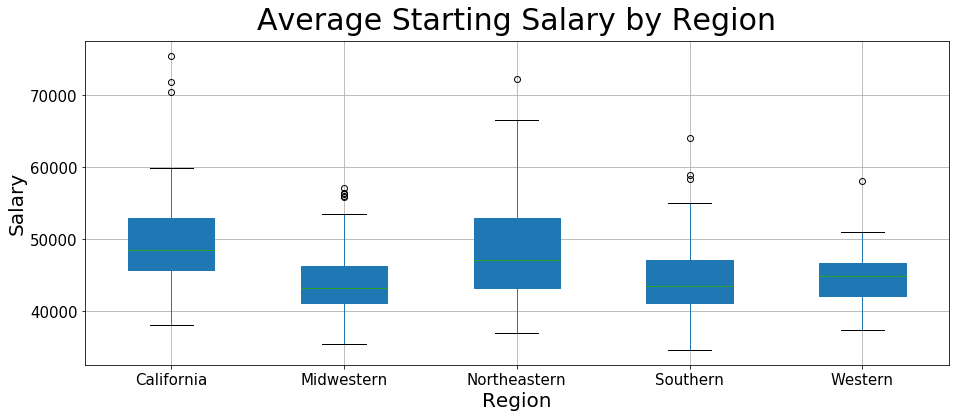

<Figure size 432x288 with 0 Axes>

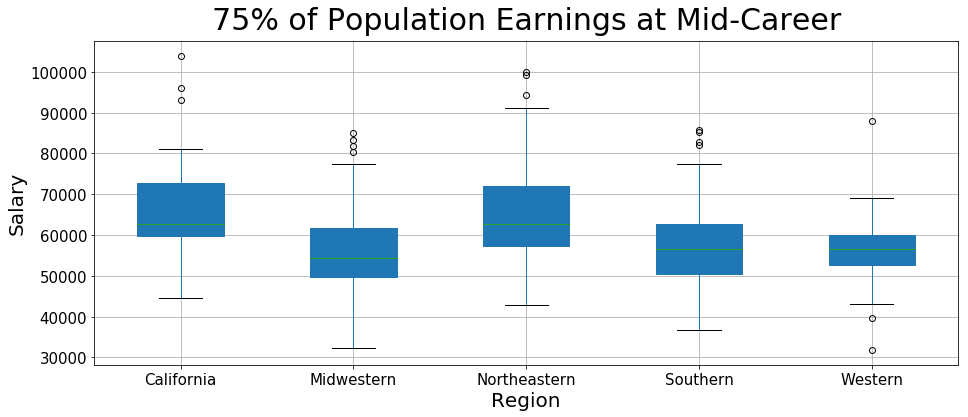

<Figure size 432x288 with 0 Axes>

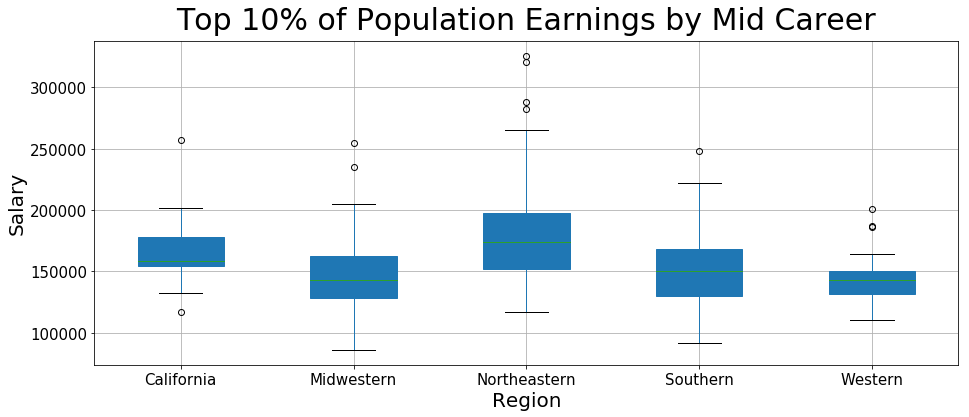

<Figure size 432x288 with 0 Axes>

In [46]:
# Create a boxplot to compare means Starting Salary
Staring_Range = Region_Sort.boxplot("Starting_Mid", by="Region", figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("Average Starting Salary by Region", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()
# Save the figure
plt.savefig("StartingSalMeanByRegion.png")

# Create a boxplot to compare means Mid_25th Salary
Most_People_Earned = Region_Sort.boxplot("Mid_25th", by="Region", figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("75% of Population Earnings at Mid-Career", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()
# Save the figure
plt.savefig("Mid25thSalaryByRegion.png")

# Create a boxplot to compare means Mid_90th Salary
Hightest_Salaries = Region_Sort.boxplot(by=["Region"], column=["Mid_90th"], figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("Top 10% of Population Earnings by Mid Career", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()
# Save the figure
plt.savefig("Mid90thSalaryByRegion.png")


In [40]:
#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Salary_df.sort_values(['Region', 'Starting_Mid'], ascending=[True, False])
Region_Sort.head()

,School Name,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,False


In [41]:
#Find the mean for each period of Salary change and groupby the Region names
Region_df = Region_Sort.groupby('Region', as_index=False)['Starting_Mid','Mid_Sal','Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th'].mean()
Region_df

,Region,Starting_Mid,Mid_Sal,Mid_10th,Mid_25th,Mid_75th,Mid_90th
0,California,51032.142857,93132.142857,47777.272727,67153.571429,127350.000000,167909.090909
1,Midwestern,44225.352113,78180.281690,43076.562500,57026.760563,107594.366197,147689.062500
2,Northeastern,48496.000000,91352.000000,49101.219512,65479.000000,129576.000000,181926.829268
3,Southern,44521.518987,79505.063291,43074.647887,57506.329114,109662.025316,152769.014085
4,Western,44414.285714,78200.000000,42985.294118,56580.952381,106026.190476,143823.529412


In [42]:
# Find the number of schools in each Region
School_Count_by_Region = Region_Salary_df['Region'].value_counts()
School_Count_by_Region

Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64

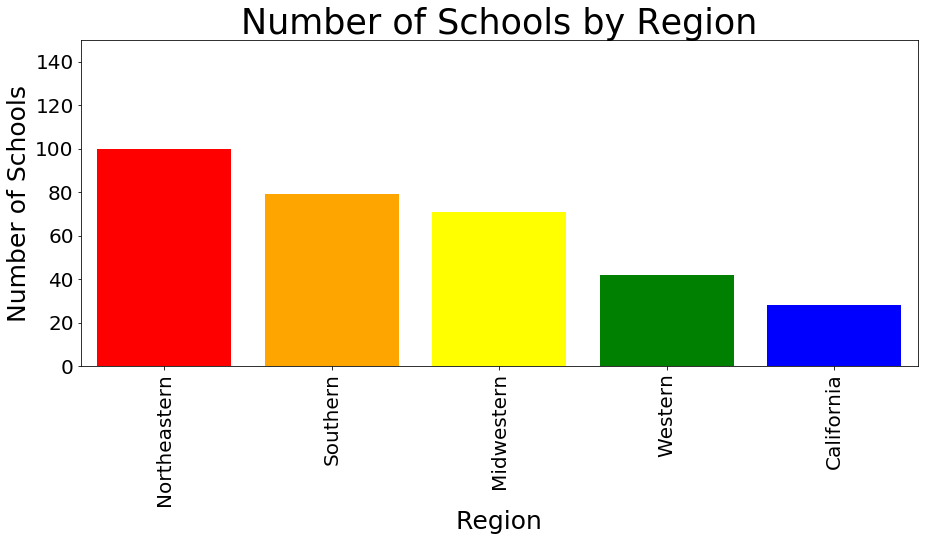

<Figure size 432x288 with 0 Axes>

In [44]:
# Use DataFrame.plot() in order to create a bar chart of the data
x_axis = np.arange(len(School_Count_by_Region))
School_Count_by_Region.plot(kind="bar", fontsize=20, figsize=(15,6))

# Set a title for the chart
plt.title("Number of Schools by Region", fontsize=35)

plt.bar(x_axis, School_Count_by_Region, alpha=1, color=['red','orange','yellow','green','blue'])
plt.xlabel("Region", fontsize=25)
plt.ylabel("Number of Schools", fontsize=25)

# Sets the y limits of the current chart
plt.ylim(0, max(School_Count_by_Region)+50)
plt.show()
plt.savefig("NumberOfSchoolsByRegion.png")

In [ ]:
#Create groups for Analysis of Variances to test the differences between the Starting Means of the Regions
Salary_Mid_Gr1 = Region_Salary_df[Region_Salary_df['Region'] == 'Northeastern']['Starting_Mid']
Salary_Mid_Gr2 = Region_Salary_df[Region_Salary_df['Region'] == 'California']['Starting_Mid']
Salary_Mid_Gr3 = Region_Salary_df[Region_Salary_df['Region'] == 'Southern']['Starting_Mid']
Salary_Mid_Gr4 = Region_Salary_df[Region_Salary_df['Region'] == 'Midwestern']['Starting_Mid']
Salary_Mid_Gr5 = Region_Salary_df[Region_Salary_df['Region'] == 'Western']['Starting_Mid']

#Perform Analysis of Variance (ANOVA) test
stats.f_oneway(Salary_Mid_Gr1, Salary_Mid_Gr2, Salary_Mid_Gr3, Salary_Mid_Gr4, Salary_Mid_Gr5)